In [20]:
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('..\Datasets\house_prices.csv')

In [22]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


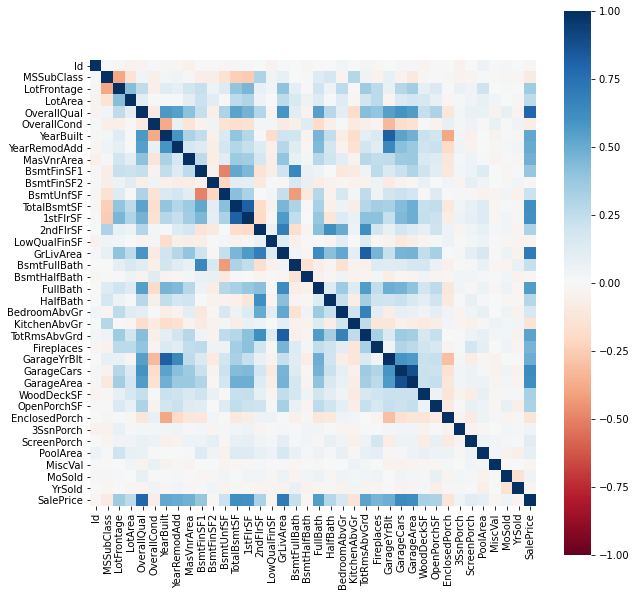

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data.corr(),
    square=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1
)
plt.show()

In [24]:
feature_subset = [
    'GarageArea', 'GarageCars','GarageCond','GarageFinish','GarageQual','GarageType',
    'GarageYrBlt','GrLivArea','LotArea','MasVnrArea','SalePrice'
]

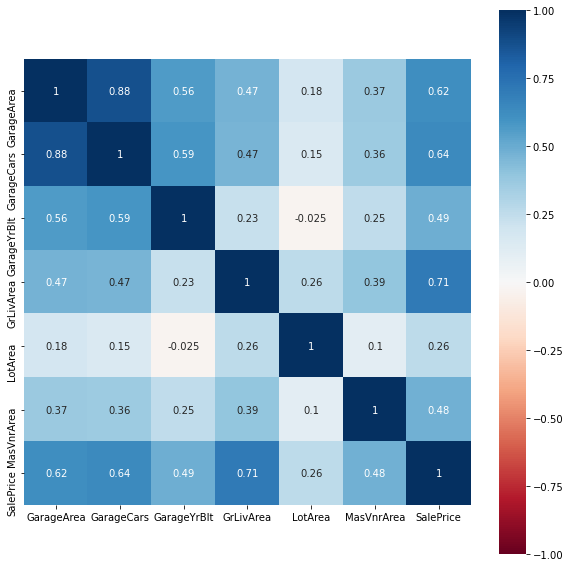

In [25]:
data_to_plot = data[feature_subset]
plt.figure(figsize=(10,10))
sns.heatmap(
    data_to_plot.corr(),
    square=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    annot=True
)
plt.show()

In [26]:
data_to_plot.dropna()

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,SalePrice
0,548,2,TA,RFn,TA,Attchd,2003.0,1710,8450,196.0,208500
1,460,2,TA,RFn,TA,Attchd,1976.0,1262,9600,0.0,181500
2,608,2,TA,RFn,TA,Attchd,2001.0,1786,11250,162.0,223500
3,642,3,TA,Unf,TA,Detchd,1998.0,1717,9550,0.0,140000
4,836,3,TA,RFn,TA,Attchd,2000.0,2198,14260,350.0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,460,2,TA,RFn,TA,Attchd,1999.0,1647,7917,0.0,175000
1456,500,2,TA,Unf,TA,Attchd,1978.0,2073,13175,119.0,210000
1457,252,1,TA,RFn,TA,Attchd,1941.0,2340,9042,0.0,266500
1458,240,1,TA,Unf,TA,Attchd,1950.0,1078,9717,0.0,142125


<Figure size 936x936 with 0 Axes>

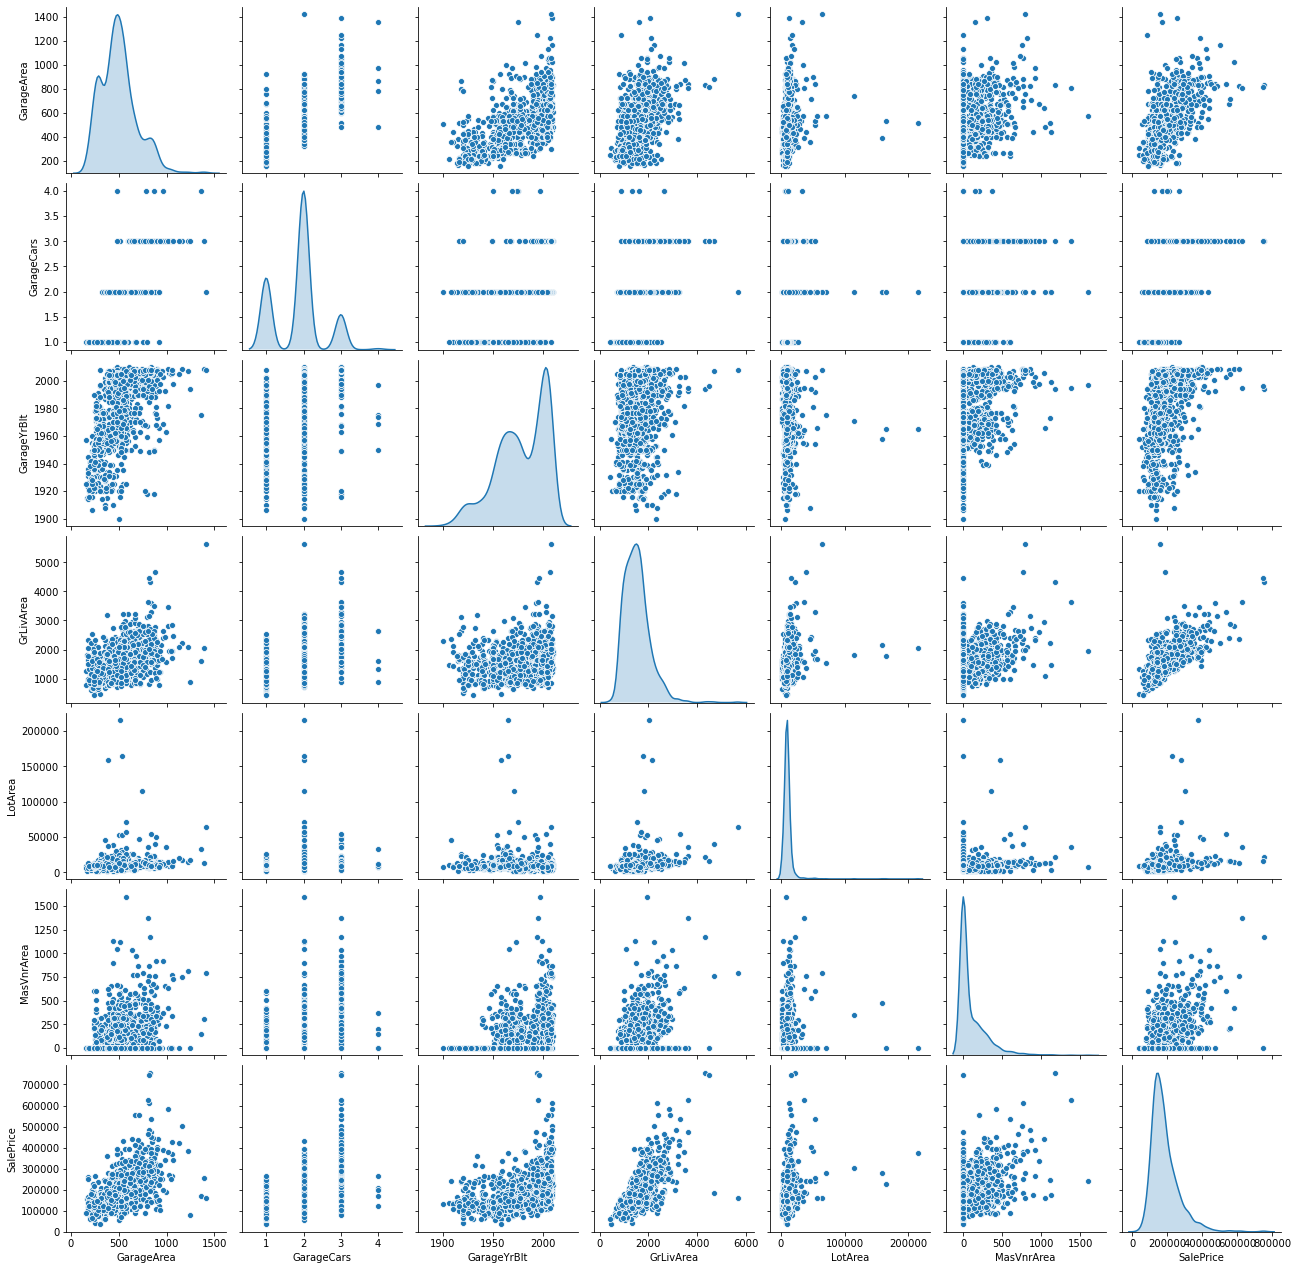

In [27]:
plt.figure(figsize = (13,13))
sns.pairplot(
    data_to_plot.dropna(),
    kind='scatter',
    diag_kind='kde',
)
plt.show()

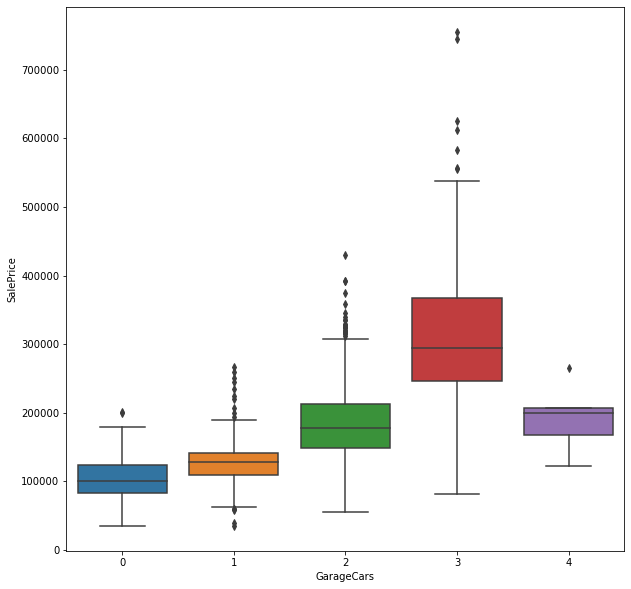

In [28]:
plt.figure(figsize = (10,10))
sns.boxplot(
    x = 'GarageCars',
    y = 'SalePrice',
    data = data
)
plt.show()

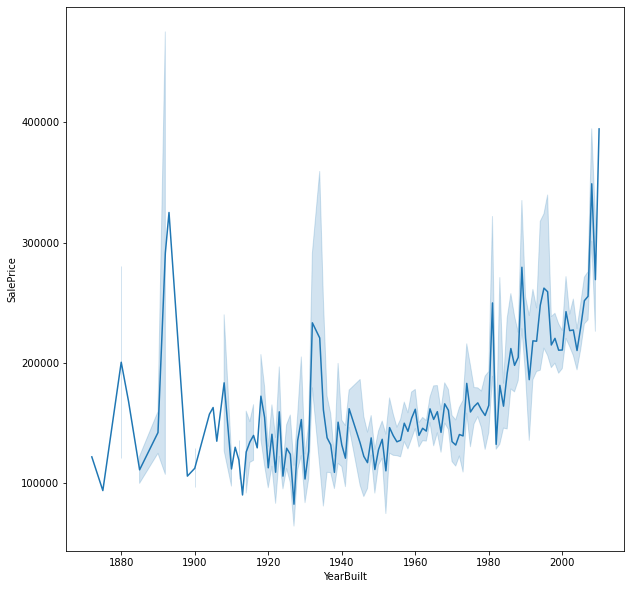

In [29]:
plt.figure(figsize = (10,10))
sns.lineplot(
    x = 'YearBuilt',
    y = 'SalePrice',
    data = data
)
plt.show()